# 1. Bisection


One of the most common algorithms for numerical root-finding is *bisection*.

To understand the idea, recall the well-known game where:

- Player A thinks of a secret number between 1 and 100  
- Player B asks if it’s less than 50  
  
  - If yes, B asks if it’s less than 25  
  - If no, B asks if it’s less than 75  
  

And so on.

This is bisection, a relative of [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm). It works for all sufficiently well behaved increasing continuous functions with $ f(a) < 0 < f(b) $. 

Write an implementation of the bisection algorith, `bisect(f, lower, upper, tol)` which, given a function `f`, a lower bound `lower` and an upper bound `upper` finds the point `x` where `f(x) = 0`. The parameter `tol` is a numerical tolerance, you should stop once your step size is smaller than `tol`.


Use it to minimize the function:

$$
f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1 \tag{2}
$$

in python: `lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1`

The value where f(x) = 0 should be around `0.408`

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

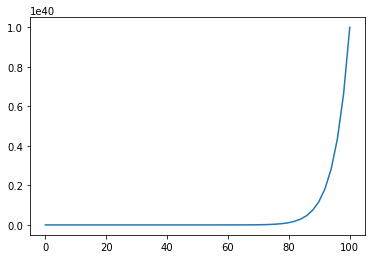

In [2]:
def bisect(f, lower, upper, tol):
    lower = lower
    upper = upper
    mid=(upper+lower)/2
    x = np.linspace(0, 1, 125)
    while (upper-lower) > tol:
        mid=(upper+lower)/2
        if(f(mid)>0):
            lower=lower
            upper=mid
        else:
            lower=mid
            upper=upper
    return 0.5 * (upper + lower)
    
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1  
lower = 1
upper = 100
tol = 0.0000005

bisect(f, lower, upper, tol)
x = np.linspace(0, 100)
fig,ax = plt.subplots()
ax.plot(x,f(x))

In [3]:
bisect(f, 0, 1, 0.0000005)

0.4082934856414795

# 1.2 (stretch) Recursive Bisect

Write a recursive version of the bisection algorithm

# 2.1 Movies Regression

Write the best linear regression model you can on the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=ratings.csv) to predict the profitability of a movie (revenue - budget). Maintain the interpretability of the model.

Few notes:

1. Clean your data! Movies where the budget or revenue are invalid should be thrown out

2. Be creative with feature engineering. You can include processing to one-hot encode the type of movie, etc.

3. The model should be useful for someone **who is thinking about making a movie**. So features like the popularity can't be used. You could, however, use the ratings to figure out if making "good" or "oscar bait" movies is a profitable strategy.

In [4]:
df = pd.read_csv("data/movies_metadata.csv")
df.head()

C:\Users\pchiu\Documents\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
#cleaning data
clean_df = df[~df['budget'].str.contains('jpg')].copy()
clean_df['release_date'] = pd.to_datetime(clean_df['release_date'])
clean_df['budget'] = clean_df['budget'].astype(float)
clean_df = clean_df.drop(['belongs_to_collection','original_title','imdb_id','title','tagline','spoken_languages','popularity','overview','poster_path','homepage','video'],axis=1)
clean_df['profitability']= clean_df['revenue'] - clean_df['budget']

In [ ]:
#clean_df = clean_df.dropna(subset=['genres'],axis=0)
#clean_df = clean_df.dropna(subset=['production_companies'],axis=0)

In [6]:
#getting 1 genre
clean_df = clean_df.dropna(subset=['genres'],axis=0)
clean_df['genres'] = clean_df['genres'].apply(lambda x: eval(x))
clean_df['genres'] = clean_df['genres'].apply(lambda x: x[0]['name'] if len(x) > 0 else '')
clean_df['genres'] = clean_df['genres'].loc[clean_df['genres'] != '']

In [7]:
clean_df = clean_df.loc[~((clean_df['budget'] ==0) | (clean_df['revenue'] == 0))]
clean_df.reset_index(inplace=True,drop=True)

In [8]:
#creating new column
clean_df['day_of_wk'] = clean_df['release_date'].dt.day_name()

In [9]:
clean_df = clean_df.dropna(subset=['runtime'],axis=0)

In [10]:
cat_col = ['genres','day_of_wk']
X = clean_df[['vote_average','vote_count','runtime']]

for c in cat_col:
    #X = pd.concat([X,pd.get_dummies(clean_df[c],drop_first=True,prefix=c)],axis=1)
    X = X.join(pd.get_dummies(clean_df[c],drop_first=True,prefix=c))
X
y= clean_df['profitability']


X = sm.add_constant(X)
profit_model = sm.OLS(y,X).fit()
profit_predict = profit_model.predict(X)

profit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          profitability   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     267.1
Date:                Fri, 05 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:15:09   Log-Likelihood:            -1.0618e+05
No. Observations:                5380   AIC:                         2.124e+05
Df Residuals:                    5351   BIC:                         2.126e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -4.139e+06   1.03e+07     -0.401      0.688   -2.44e+07    1.61e+07
vote_average           -7.878e+06   1.52e+06     -5.181      0.000   -1.09e+07    -4.9e+06
vote_count              8.158e+04   1110.190     73.480      0.000    7.94e+04    8.38e+04
runtime                 4.151e+05    6.3e+04      6.594      0.000    2.92e+05    5.39e+05
genres_Adventure        2.699e+07   5.33e+06      5.065      0.000    1.65e+07    3.74e+07
genres_Animation        7.956e+07    8.2e+06      9.697      0.000    6.35e+07    9.56e+07
genres_Comedy           1.135e+07   4.09e+06      2.775      0.006    3.33e+06    1.94e+07
genres_Crime           -1.656e+07   6.31e+06     -2.623      0.009   -2.89e+07   -4.18e+06
genres_Documentary      1.711e+07   1.35e+07      1.267      0.205   -9.36e+06    4.36e+07
genres_Drama           -7.524e+06   3.97e+06     -1.895      0.058   -1.53e+07    2.58e+05
genres_Family           9.715e+07   1.26e+07      7.722      0.000    7.25e+07    1.22e+08
genres_Fantasy          8.653e+06   8.18e+06      1.057      0.290   -7.39e+06    2.47e+07
genres_Foreign         -7.385e+06   4.53e+07     -0.163      0.871   -9.63e+07    8.15e+07
genres_History          1.604e+05   1.71e+07      0.009      0.993   -3.34e+07    3.37e+07
genres_Horror          -2.182e+06   5.87e+06     -0.372      0.710   -1.37e+07    9.32e+06
genres_Music            1.091e+07   1.58e+07      0.690      0.490   -2.01e+07    4.19e+07
genres_Mystery         -1.198e+07   1.14e+07     -1.047      0.295   -3.44e+07    1.05e+07
genres_Romance          9.157e+06   8.74e+06      1.047      0.295   -7.99e+06    2.63e+07
genres_Science Fiction  -9.72e+06   9.35e+06     -1.040      0.298    -2.8e+07     8.6e+06
genres_TV Movie         3.987e+07   9.07e+07      0.440      0.660   -1.38e+08    2.18e+08
genres_Thriller        -1.682e+07   7.04e+06     -2.391      0.017   -3.06e+07   -3.03e+06
genres_War             -2.066e+07    1.5e+07     -1.377      0.168   -5.01e+07    8.75e+06
genres_Western         -2.204e+07   1.66e+07     -1.330      0.184   -5.45e+07    1.04e+07
day_of_wk_Monday        3.017e+06   6.18e+06      0.488      0.625   -9.09e+06    1.51e+07
day_of_wk_Saturday     -1.751e+06   5.95e+06     -0.294      0.769   -1.34e+07    9.92e+06
day_of_wk_Sunday        6.365e+06   6.86e+06      0.927      0.354   -7.09e+06    1.98e+07
day_of_wk_Thursday      3.908e+06   3.34e+06      1.170      0.242   -2.64e+06    1.05e+07
day_of_wk_Tuesday       1.743e+07   5.17e+06      3.371      0.001    7.29e+06    2.76e+07
day_of_wk_Wednesday     6.002e+06   3.55e+06      1.690      0.091    -9.6e+05     1.3e+07
==============================================================================
Omnibus:                     3979.317   Durbin-Watson:                   1.939
Prob(Omnibus)

We can see the runtime of the movie is important. Adventure, Animation Comedy, Documentary, Family, Fantasy, History, Music, Romance, TV Movie give a positive coeefficient compared to Action. If a person wants to make a movie, they should consider focusing on one of the genres(Family, Romance and Fantasy) or somehow putting all 3 genres together. When the movie is in theatres, they should consider playing the movie on cheapy Tuesday. 

# 2.2 Movies Manual Regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using the normal equation $(X^T X)^{-1}X^Ty$.

Verify that the coefficients are the same.

In [ ]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

In [11]:
betas = np.linalg.inv(X.T @ X) @ X.T @ y
betas

0    -4.138548e+06
1    -7.877709e+06
2     8.157659e+04
3     4.151410e+05
4     2.698878e+07
5     7.956129e+07
6     1.135135e+07
7    -1.656058e+07
8     1.711158e+07
9    -7.524452e+06
10    9.715480e+07
11    8.652967e+06
12   -7.385297e+06
13    1.604013e+05
14   -2.182476e+06
15    1.091159e+07
16   -1.197745e+07
17    9.156622e+06
18   -9.719529e+06
19    3.987157e+07
20   -1.682147e+07
21   -2.066296e+07
22   -2.204051e+07
23    3.017381e+06
24   -1.751236e+06
25    6.364781e+06
26    3.908391e+06
27    1.743478e+07
28    6.001944e+06
dtype: float64

# 2.3 Movies gradient descent regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using **gradient descent**. 

Hint: use `scipy.optimize` and remember we're finding the $\beta$ that minimizes the squared loss function of linear regression: $f(\beta) = (\beta X - y)^2$. This will look like part 3 of this lecture.

Verify your coefficients are similar to the ones in 2.1 and 2.2. They won't necessarily be exactly the same, but should be roughly similar.

In [12]:
from scipy.optimize import minimize
import numpy as np

betas=np.zeros(X.shape[1])
#gradient = lambda X,y,betas: np.sum((betas @X - @y)**2)
def gradient(X,y,betas):
     return np.sum((betas @X - y)**2)
h = minimize(gradient,betas,args=(y,X),method='Powell')


In [13]:
h['x']

array([-5.09702156e+06, -7.65031680e+06,  8.14517488e+04,  4.18737170e+05,
        2.62737414e+07,  7.89184345e+07,  1.06216980e+07, -1.73987726e+07,
        1.61727970e+07, -8.40060652e+06,  9.65029921e+07,  7.92978771e+06,
       -8.14691052e+06, -8.28170060e+05, -2.83829360e+06,  9.97546305e+06,
       -1.27176195e+07,  8.35326828e+06, -1.03837037e+07,  3.88965664e+07,
       -1.75402850e+07, -2.15272704e+07, -2.30399960e+07,  2.86632529e+06,
       -1.91799791e+06,  6.24103950e+06,  3.76272644e+06,  1.73062455e+07,
        5.47295207e+06])